# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [3]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

point_train_X = data_train[:, 0]
point_train_Y = data_train[:, 1]
train_label   = data_train[:, 2]
    
point_test_X = data_test[:, 0]
point_test_Y = data_test[:, 1]
test_label   = data_test[:, 2]

num_data = data_train.shape[0]
print(num_data)

500


## plot the data

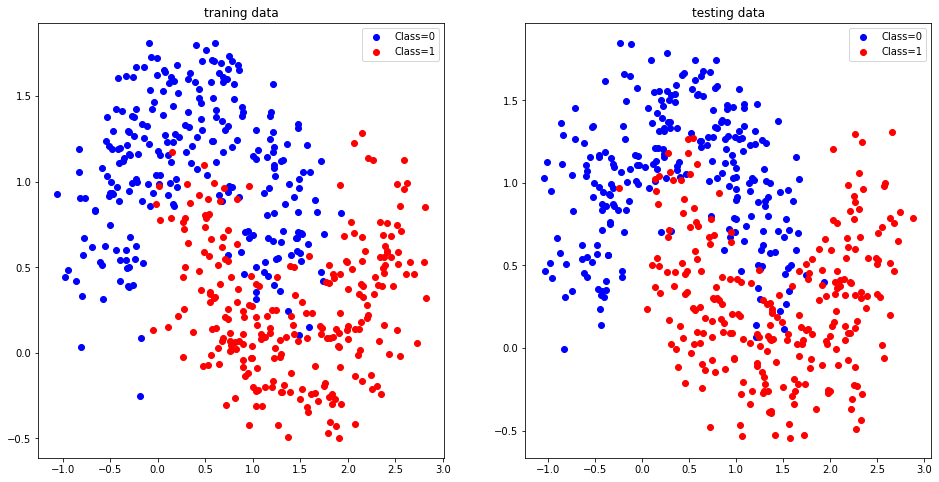

In [18]:
plot_data(data_train, data_test)

## define feature function

In [5]:
def feature_function(x, y):
    
    ############################
    
    # f: 1 + x + x**2 + x**3 = y
    feature = np.empty((0, num_data))
    feature = np.append(feature, np.array([[1]*num_data]), axis=0)
    feature = np.append(feature, np.array([x]), axis=0)
    feature = np.append(feature, np.array([x**2]), axis=0)
    feature = np.append(feature, np.array([x**3]), axis=0)
    feature = np.append(feature, np.array([y]), axis=0)
       
    
    ############################
    return feature

## define regression function based on the feature function

In [6]:
def regression_function(theta, feature):
    
    ############################
    
    value = theta.dot(feature)
    
    ############################
    
    return value

## define regularization function on the model parameters

In [7]:
def regularization_function(theta):
    
    ############################
    
    # ||theta||**2
    
    value = sum(theta**2)
    
    ############################
    
    return value

## define sigmoid function

In [8]:
def logistic_function(theta, feature):  
    # x is data
    
    ############################
    
    f = regression_function(theta, feature)
    z = (1/(1+np.exp(-f)))  # z is logistic regresstion function(sigmoid)
    
    ############################
    
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [75]:
def compute_loss_feature(theta, feature, label, alpha):
    
    ############################
    
    h = logistic_function(theta, feature)  # h(x, y;thate): logistic regresstion function
    regularization = regularization_function(theta)
    
#     loss_sum = 0
#     for i in range(num_data):
    loss_sum = np.sum(label*(np.log(h+np.finfo(float).eps)) + (1 - label)*(np.log(1-h+np.finfo(float).eps)))
    
    # + (alpha/2)*||theta||**2
    loss = (-(1/num_data)) * loss_sum + (alpha/2) * regularization
        
    
    ############################
    
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [76]:
def compute_gradient_feature(theta, feature, label, alpha):
    
    ############################
    
#     X = feature
#     XT = feature.T
#     I_alpha = alpha * np.identity(num_data)

    h = logistic_function(theta, feature)  # h(x, y;thate): logistic regresstion function
    
    gradient = (1/num_data) * (feature.dot((h-label).T)) + alpha * theta
    
    ############################
    
    return gradient

## compute the accuracy

In [77]:
def compute_accuracy(theta, feature, label):
    
    ############################
    
    correct = 0
    h = logistic_function(theta, feature)
    for i in range(num_data):
        prediction = round(h[i])
        if prediction == label[i]:
            correct += 1
        
    accuracy = (correct / num_data)  # 0 ~ 1사이의 accuracy: 소수점이하 5자리 수
#     print ('accuracy: {:.5f}'.format(accuracy))
    
    ############################
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [82]:
num_iteration = 30000
learning_rate = 0.1
# alpha = 0.00001
alpha = 0.000000001

############################

train_feature = feature_function(point_train_X, point_train_Y)
test_feature = feature_function(point_test_X, point_test_Y)
theta = np.array((0, 0, 0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
dim_feature = theta.shape[0]


############################


In [83]:
theta_iteration             = np.zeros((num_iteration, dim_feature))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [84]:
for i in range(num_iteration):
    
    ############################
    
    theta = theta - learning_rate * compute_gradient_feature(theta, train_feature, train_label, alpha)
    theta_iteration[i, :] = theta

    train_loss = compute_loss_feature(theta, train_feature, train_label, alpha)
    test_loss = compute_loss_feature(theta, test_feature, test_label, alpha)  # feature= test_feature or train_feature????
    loss_iteration_train[i] = train_loss
    loss_iteration_test[i] = test_loss
    
    train_accuracy = compute_accuracy(theta, train_feature, train_label)
    test_accuracy = compute_accuracy(theta, test_feature, test_label)
    
    accuracy_iteration_train[i] = train_accuracy
    accuracy_iteration_test[i] = test_accuracy
    
    if i > 29900:
        print("{}, {}, {}, {}, {}".format(i, train_loss, test_loss, train_accuracy, test_accuracy))

    ############################
    
theta_optimal = theta

29901, 0.170024770169787, 0.1760093618932193, 0.926, 0.932
29902, 0.17002408699984742, 0.1760087984724104, 0.926, 0.932
29903, 0.17002340386615133, 0.17600823508630975, 0.926, 0.932
29904, 0.17002272076869585, 0.17600767173491447, 0.926, 0.932
29905, 0.170022037707478, 0.17600710841822137, 0.926, 0.932
29906, 0.17002135468249494, 0.17600654513622754, 0.926, 0.932
29907, 0.17002067169374382, 0.17600598188893, 0.926, 0.932
29908, 0.17001998874122162, 0.17600541867632566, 0.926, 0.932
29909, 0.1700193058249256, 0.1760048554984115, 0.926, 0.932
29910, 0.17001862294485282, 0.1760042923551846, 0.926, 0.932
29911, 0.17001794010100033, 0.17600372924664187, 0.926, 0.932
29912, 0.17001725729336534, 0.17600316617278033, 0.926, 0.932
29913, 0.17001657452194485, 0.17600260313359692, 0.926, 0.932
29914, 0.1700158917867361, 0.17600204012908877, 0.926, 0.932
29915, 0.1700152090877361, 0.17600147715925277, 0.926, 0.932
29916, 0.17001452642494191, 0.17600091422408587, 0.926, 0.932
29917, 0.1700138437983

## compute accuracy of the classifiers

In [85]:
print(theta_optimal)

accuracy_train  = compute_accuracy(theta_optimal, train_feature, train_label)
accuracy_test   = compute_accuracy(theta_optimal, test_feature, test_label)

print(accuracy_train)
print(accuracy_test)

[  3.98307044   7.78223813 -13.83648054   5.2744542   -5.74426506]
0.926
0.932


## plot the results

In [86]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
   
    ############################
    
    plt.title('loss')
    
    plt.plot(loss_iteration_train, '-', color='red')
    plt.plot(loss_iteration_test, '-', color='blue')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()
    
    ############################
    

In [87]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    ############################
    
    plt.title('accuracy')
    
    plt.plot(accuracy_iteration_train, '-', color='red')
    plt.plot(accuracy_iteration_test, '-', color='blue')

    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()
    
    ############################
    

In [88]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))

    ############################

    plt.subplot(1, 2, 1)
    plt.title('traning data')
    
    train = data_train[:, [0,1]]
    train_lable = data_train[:, 2]
    
    cnt_L0, cnt_L1 = 0, 0 
    for i in range(0, num_data):
        if train_lable[i] == 0:
            cnt_L0 += 1
        else:
            cnt_L1 += 1
    x0 = np.ones((cnt_L0,2)) 
    x1 = np.ones((cnt_L1,2)) 
    
    k0, k1 = 0, 0
    for i in range(0, num_data):
        if train_lable[i] == 0:
            x0[k0] = train[i]
            k0 += 1
        else:
            x1[k1] = train[i]
            k1 += 1
            
    X = [x0, x1]
    colors = ["blue", "red"] 
    
    for x, c in zip(X, colors):
        if c == "blue":
            plt.scatter(x[:,0], x[:,1], color=c, label="Class=0")
        else:
            plt.scatter(x[:,0], x[:,1], color=c, label="Class=1")
            
    plt.legend()


            
    ############################
    
    plt.subplot(1, 2, 2)
    plt.title('testing data')
    
    test = data_test[:, [0,1]]
    test_lable = data_test[:, 2]

    
    cnt_L0, cnt_L1 = 0, 0 
    for i in range(0, num_data):
        if test_lable[i] == 0:
            cnt_L0 += 1
        else:
            cnt_L1 += 1
    x0 = np.ones((cnt_L0,2)) 
    x1 = np.ones((cnt_L1,2)) 
    
    k0, k1 = 0, 0
    for i in range(0, num_data):
        if test_lable[i] == 0:
            x0[k0] = test[i]
            k0 += 1
        else:
            x1[k1] = test[i]
            k1 += 1
            
    X = [x0, x1]
    colors = ["blue", "red"] 
    
    for x, c in zip(X, colors):
        if c == "blue":
            plt.scatter(x[:,0], x[:,1], color=c, label="Class=0")
        else:
            plt.scatter(x[:,0], x[:,1], color=c, label="Class=1")

            
    plt.legend()

    
    ############################
    

In [89]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
   
    ############################
    
    theta_iteration.shape[0]
    plt.plot(theta_iteration[:, 0], '-', color='red', label='$\Theta_0$')
    plt.plot(theta_iteration[:, 1], '-', color='green', label='$\Theta_1$')
    plt.plot(theta_iteration[:, 2], '-', color='blue', label='$\Theta_2$')
    plt.plot(theta_iteration[:, 1], '-', color='yellow', label='$\Theta_3$')
    plt.plot(theta_iteration[:, 2], '-', color='purple', label='$\Theta_4$')
    
    plt.xlabel('iteration')
    plt.legend(loc='right')

    plt.tight_layout()
    plt.show()
    
    
    ############################
    

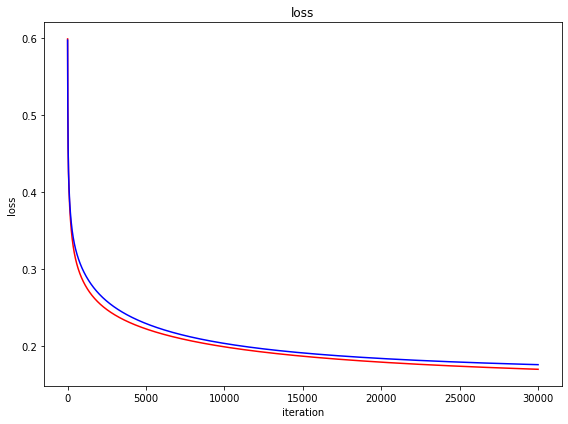

In [90]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

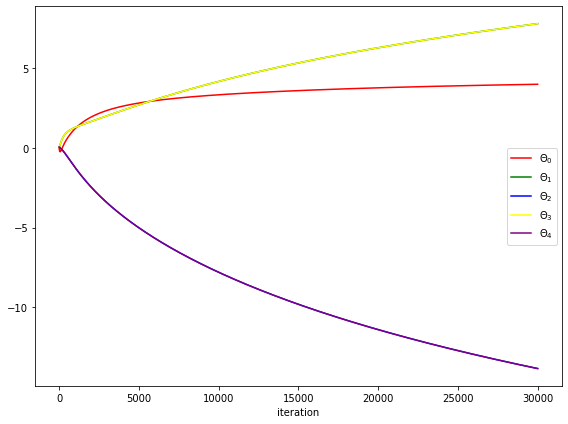

In [91]:
plot_model_parameter(theta_iteration)

In [92]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    ############################
    
    X_train = data[:,[0,1]]
    label = data[:, 2]
    
    X0  = np.arange(-1.5, 3.5, 0.01)
    Y0  = np.arange(-2.5, 3.5, 0.01)
    XX, YY = np.meshgrid(X0, Y0)
    
    ZZ = theta[0] + theta[1]*XX + theta[2]*(XX**2) + theta[3]*(XX**3) + theta[4] * YY
    
    plt.scatter(XX, YY, c=ZZ, cmap=plt.cm.RdBu_r, alpha=0.5)
    plt.colorbar()
    
    
    cnt_L0, cnt_L1 = 0, 0 
    for i in range(0, num_data):
        if label[i] == 0:
            cnt_L0 += 1
        else:
            cnt_L1 += 1
    x0 = np.ones((cnt_L0,2)) 
    x1 = np.ones((cnt_L1,2)) 
    
    k0, k1 = 0, 0
    for i in range(0, num_data):
        if label[i] == 0:
            x0[k0] = X_train[i]
            k0 += 1
        else:
            x1[k1] = X_train[i]
            k1 += 1
            
    X = [x0, x1]
    colors = ["blue", "red"] 
    
    for x, c in zip(X, colors):
        if c == "blue":
            plt.scatter(x[:,0], x[:,1], color = c, label = "Class 0")
        else:
            plt.scatter(x[:,0], x[:,1], color = c, label = "Class 1")
            
    Z_ = theta[0] + theta[1]*XX + theta[2]*(XX**2) + theta[3]*(XX**3) + theta[4] * YY
    plt.contour(XX, YY, Z_, [0], colors='black')

    plt.axis('equal')
    plt.legend(loc='upper right')
    plt.tight_layout()
#     plt.show()
    
    ############################
    

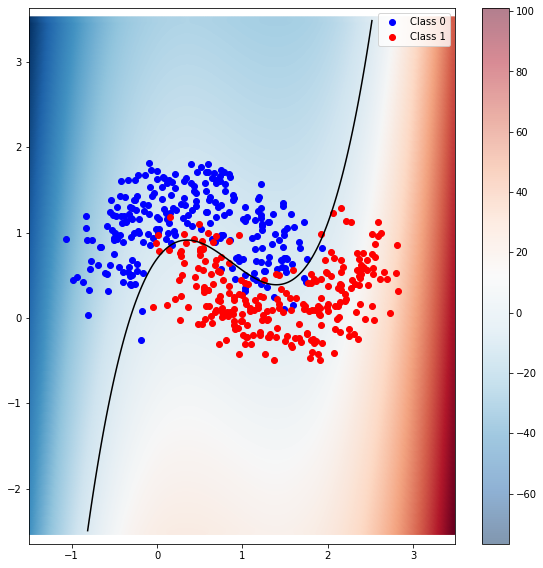

In [93]:
plot_classifier(data_train, theta_optimal)

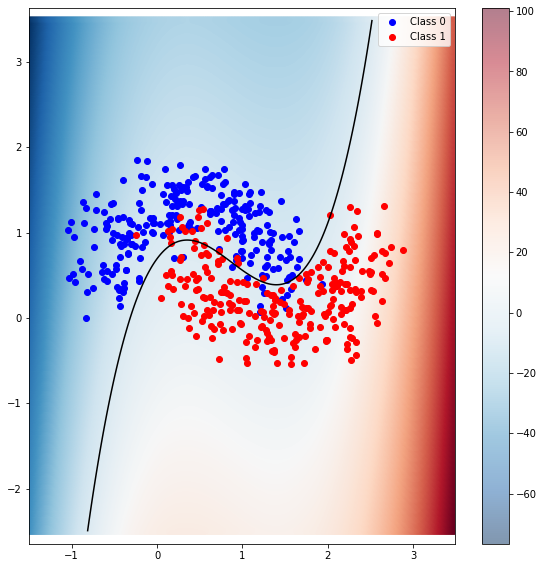

In [94]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

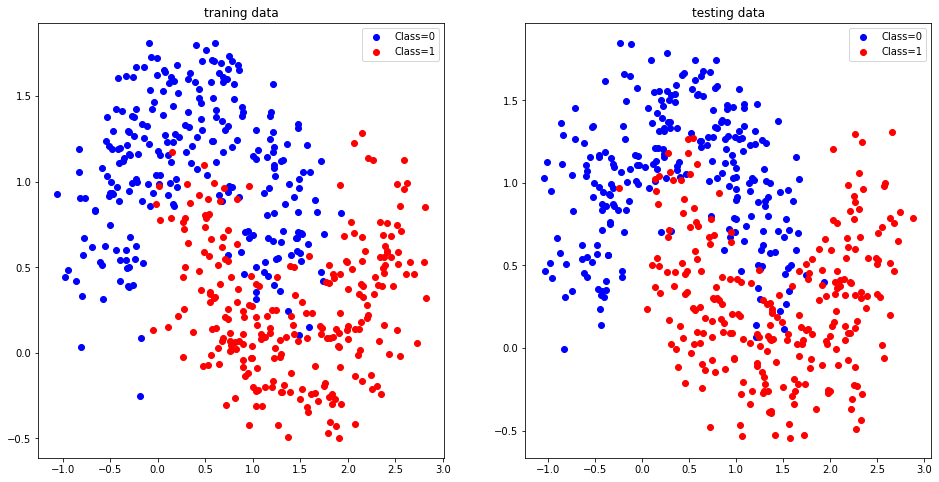

In [25]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

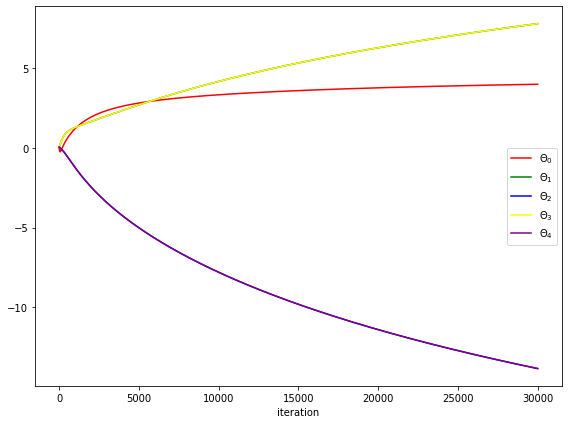

In [27]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

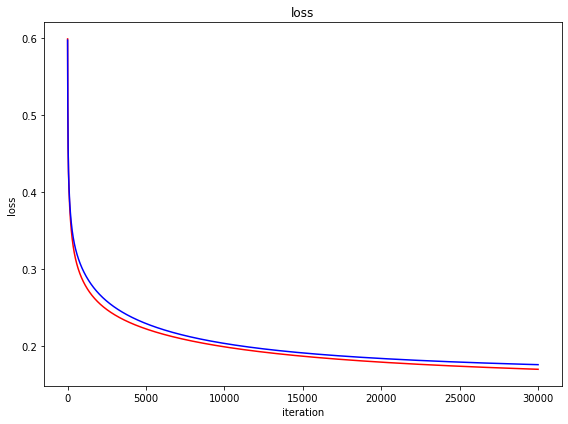

In [28]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

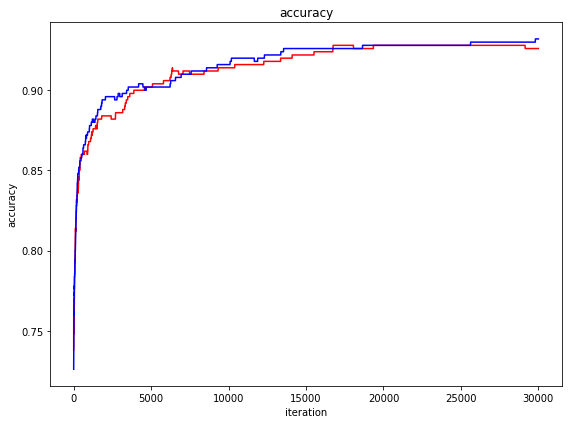

In [29]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

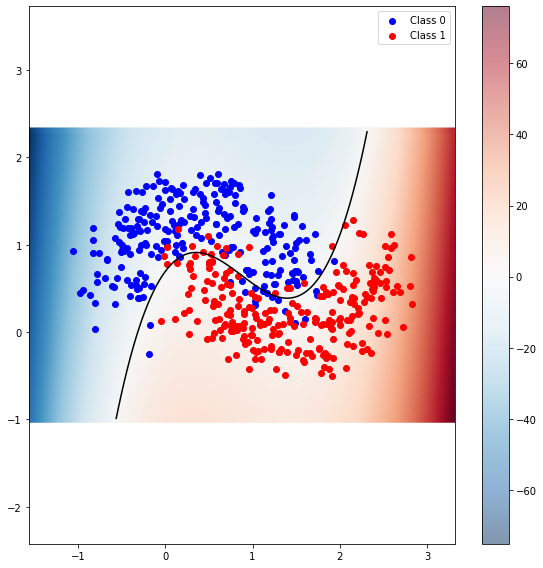

In [30]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

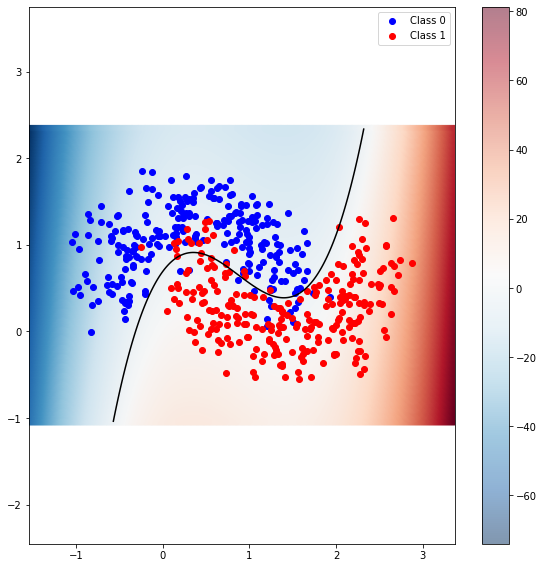

In [31]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [34]:
print('accuract(train): %.5f'%(accuracy_train))
print('accuracy(test) : %.5f'%(accuracy_test))

accuract(train): 0.92600
accuracy(test) : 0.93200
